In [1]:
import numpy as np
import matplotlib.pyplot as plt

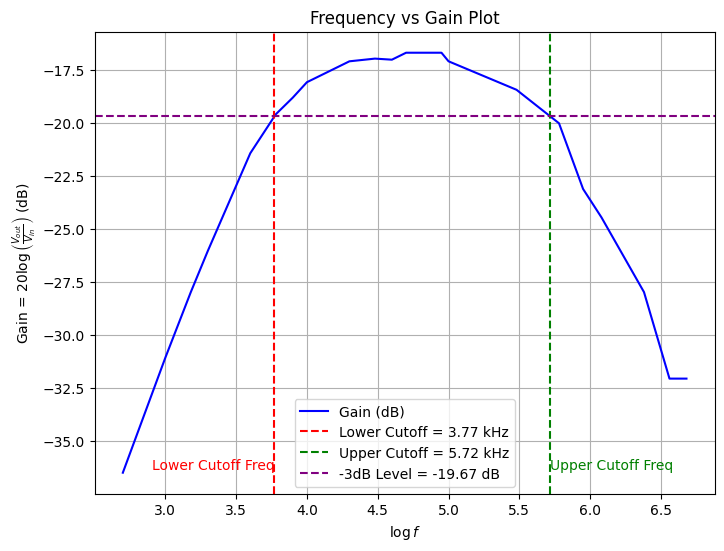

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency and Gain data
Freq = np.array([
    2.70, 3.00, 3.18, 3.30, 3.60, 3.78, 3.90, 4.00, 4.30, 4.48,
    4.60, 4.70, 4.78, 4.84, 4.90, 4.95, 5.00, 5.48, 5.78, 5.95,
    6.08, 6.38, 6.56, 6.68
])

Gain = np.array([
    -36.478, -31.056, -27.960, -26.02, -21.412, -19.576,
    -18.79, -18.062, -17.077, -16.95, -17.0, -16.672,
    -16.672, -16.672, -16.672, -16.672, -17.077, -18.42,
    -20.00, -23.098, -24.440, -27.960, -32.04, -32.04
])

# Maximum gain
gain_max = np.max(Gain)

# Calculate 3 dB cutoff level (3 dB below maximum gain)
cutoff_level = gain_max - 3

def find_cutoff_frequency(Freq, Gain, cutoff_level):
    for i in range(len(Gain)-1):
        if Gain[i] < cutoff_level <= Gain[i+1] or Gain[i+1] < cutoff_level <= Gain[i]:
            # Linear interpolation between points
            f1, f2 = Freq[i], Freq[i+1]
            g1, g2 = Gain[i], Gain[i+1]
            cutoff_freq = f1 + (cutoff_level - g1) * (f2 - f1) / (g2 - g1)
            return cutoff_freq
    return None

# Lower cutoff frequency (on the left of the max gain)
cutoff_Freq_lower = find_cutoff_frequency(Freq, Gain, cutoff_level)

# Upper cutoff frequency (on the right of the max gain)
cutoff_Freq_upper = find_cutoff_frequency(Freq[::-1], Gain[::-1], cutoff_level)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Freq, Gain, label="Gain (dB)", color="blue")
plt.axvline(x=cutoff_Freq_lower, color='red', linestyle='--', label=f"Lower Cutoff = {cutoff_Freq_lower:.2f} kHz")
plt.axvline(x=cutoff_Freq_upper, color='green', linestyle='--', label=f"Upper Cutoff = {cutoff_Freq_upper:.2f} kHz")
plt.axhline(y=cutoff_level, color='purple', linestyle='--', label=f"-3dB Level = {cutoff_level:.2f} dB")
plt.text(cutoff_Freq_lower, Gain.min(), "Lower Cutoff Freq", ha='right', va='bottom', color='red', fontsize=10)
plt.text(cutoff_Freq_upper, Gain.min(), "Upper Cutoff Freq", ha='left', va='bottom', color='green', fontsize=10)
plt.title("Frequency vs Gain Plot")
plt.xlabel(r"$\log{f}$")
plt.ylabel(r"Gain = $20 \log{ \left(\frac{V_{out}}{V_{in}}\right)}$ (dB)")
plt.grid(True)
plt.legend()

plt.savefig("Frequncy_response.png")
plt.show()
